#Importing Libraries

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [8]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --------------- ------------------------ 112.6/300.2 kB 3.3 MB/s eta 0:00:01
   ------------------------- -------------- 194.6/300.2 kB 2.4 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [26]:
from wordcloud import WordCloud, STOPWORDS
import string
import re

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Load Data

In [28]:
df = pd.read_csv ('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#Counting null values

In [29]:
null_values = df.isnull()
null_counts = null_values.sum()
null_counts

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

#Droping null values

In [30]:
df=df.dropna()
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#Counting the total number of rows and columns in the dataset

In [31]:
df.shape

(568401, 10)

#Select 'Text' and 'Score' columns

In [32]:
df1=df[['Text','Score']]
df1.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


#Count of each 'Score'

In [33]:
df1.Score.value_counts()

Score
5    363102
4     80654
1     52264
3     42638
2     29743
Name: count, dtype: int64

#Visualizing it using bar plot

<Axes: ylabel='Score'>

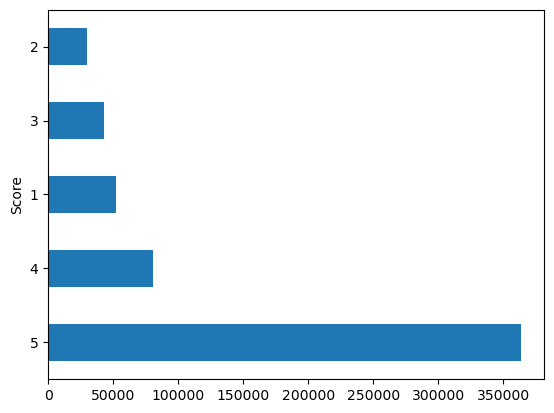

In [34]:
df1.Score.value_counts().plot(kind='barh')

#Checking the presence of null values

In [35]:
df1.isnull().sum()

Text     0
Score    0
dtype: int64

#Checking the duplicate values

In [36]:
df1[df1.duplicated()]

,Text,Score
29,I don't know if it's the cactus or the tequila...,5
574,"I'm addicted to salty and tangy flavors, so wh...",5
603,"I'm addicted to salty and tangy flavors, so wh...",5
1973,The pork chops from Omaha Steaks were very tas...,3
2309,Too much of the white pith on this orange peel...,2
...,...,...
568409,I was very pleased with the ingredient quality...,5
568410,My main reason for the five star review has to...,5
568411,I bought this to try on two registered Maine C...,5
568412,When we brought home two 3-month-old purebred ...,5


#Droping duplicate values

In [37]:
df2=df1.drop_duplicates()

In [38]:
df2.shape

(393656, 2)

#Once again counting the each 'Score' values

In [39]:
df2.Score.value_counts()

Score
5    250734
4     56073
1     36277
3     29770
2     20802
Name: count, dtype: int64

#Positive-Negative-Neutral reviews

In [40]:
def map_review(x):
    if x<3:
        return 'Negative'
    elif x==3:
        return 'Neutral'
    else:
        return 'Positive'

In [41]:
df2['Review']=df2['Score'].apply(lambda x: map_review(x))
df2.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5048\190958998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Review']=df2['Score'].apply(lambda x: map_review(x))


,Text,Score,Review
0,I have bought several of the Vitality canned d...,5,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,1,Negative
2,This is a confection that has been around a fe...,4,Positive
3,If you are looking for the secret ingredient i...,2,Negative
4,Great taffy at a great price. There was a wid...,5,Positive


#Counting total 'positive','negative','neutral' values

In [42]:
df2.Review.value_counts()

Review
Positive    306807
Negative     57079
Neutral      29770
Name: count, dtype: int64

### Text cleaning and Pre-processing

In [29]:
pip install stop-words

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32918 sha256=ac9e4d12d0f824fe34c9b959c191ef33709b62ac8661da6505f047db6de1a405
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\8f\a5\51\a5405e1da5d178491b79d12cc81b6cb9bb14fe2c8c632eba70
Successfully built stop-words
Note: you may need to restart the kernel to use updated packages.


In [43]:
import nltk
from stop_words import get_stop_words
stopwords = get_stop_words('english')

In [44]:
#stopwords
total_stopwords = set(stopwords)

#subtract negative stopwords like no,not,don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords if "n't" in word or 'no' in word)
final_stopwords = total_stopwords - negative_stop_words
final_stopwords.add("one")
print(final_stopwords)

{'him', 'does', 'from', "it's", 'while', 'he', 'itself', 'its', 'whom', 'has', 'because', 'about', "they're", 'yourself', 'having', 'her', 'himself', "when's", 'been', 'which', 'theirs', "i'll", 'why', 'for', "where's", 'with', 'them', 'am', 'these', 'or', 'your', 'have', 'being', 'could', "we've", "you'd", 'as', 'they', 'in', 'what', 'yours', 'only', "how's", 'his', 'during', 'some', 'ours', 'do', "why's", 'my', 'off', 'one', "they've", 'over', 'ought', "what's", 'those', 'and', "you'll", 'at', 'be', 'our', "she's", "there's", 'any', 'an', "i'm", 'should', 'than', 'too', 'above', "you've", 'a', 'further', "let's", "we'd", 'themselves', 'each', 'all', 'myself', 'she', 'such', 'would', 'very', 'again', 'once', 'up', 'between', 'doing', "he'd", 'were', 'how', 'did', 'had', "he's", 'under', "they'd", 'to', "he'll", 'is', 'that', 'it', 'their', 'before', 'if', "that's", 'you', 'was', 'we', "she'll", "she'd", 'so', 'against', 'the', "you're", "here's", 'but', 'where', 'both', 'this', 'by', 

In [45]:
#stemming object
stemmer = PorterStemmer()
HTMLTAGS = re.compile('<.*?>')
table=str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('','',string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")

In [46]:
def Text_prepocessor(review):
    #remove HTML tags
    review = HTMLTAGS.sub(r'',review)
    
    #remove puncutuation
    review = review.translate(table)
    
    #remove digits
    review = review.translate(remove_digits)
    
    #lowercase letters
    review = review.lower()
    
    #replace multiple white spaces with single space
    review = MULTIPLE_WHITESPACE.sub(" ",review).strip()
    
    #remove stopwords
    review = [word for word in review.split() if word not in final_stopwords]
    
    #stemming
    review = ' '.join([stemmer.stem(word) for word in review])
    
    return review

In [47]:
#sample text
text= 'I have bought several of the Vitality canned dog food products, I have found them all to be of good quality.'

In [48]:
Text_prepocessor(text)

'bought sever vital can dog food product found good qualiti'

#WordCloud

In [49]:
def generate_wcloud(text):
    stopwords = set(STOPWORDS)
    wordcloud=WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(text)
    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

#positive review wordcloud

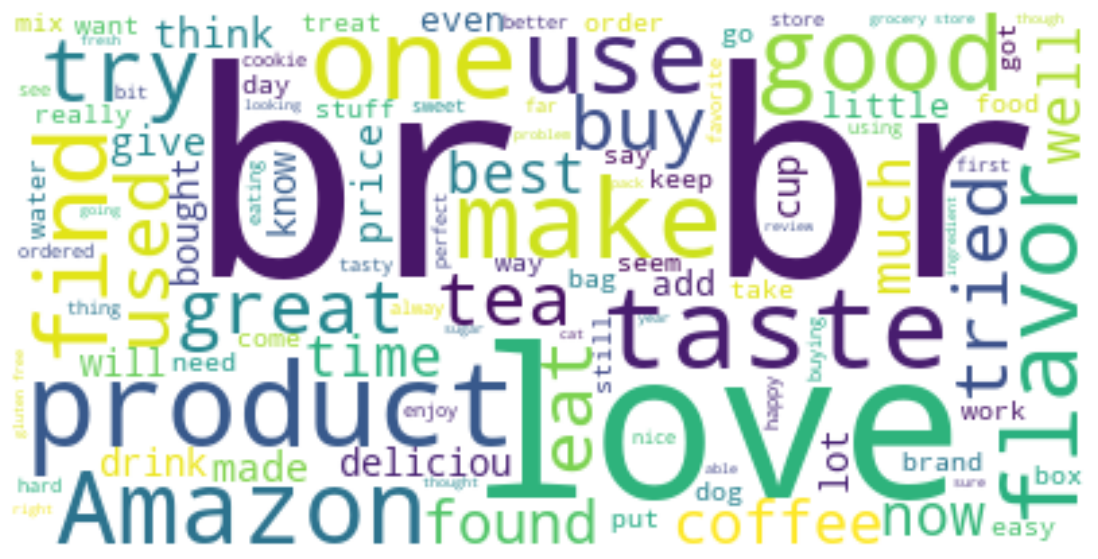

In [57]:
pos = df2.loc[df2.Review =="Positive"].Text
text= " ".join(review for review in pos.astype(str))
generate_wcloud(text)

#negative review wordcloud

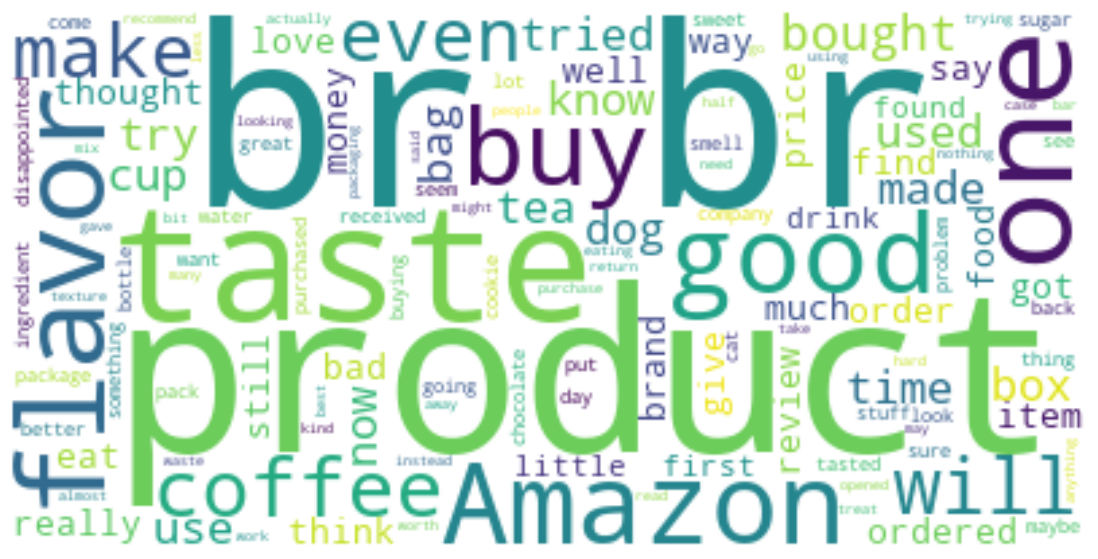

In [58]:
Neg = df2.loc[df2.Review =="Negative"].Text
text= " ".join(review for review in Neg.astype(str))
generate_wcloud(text)

#neutral review wordcloud

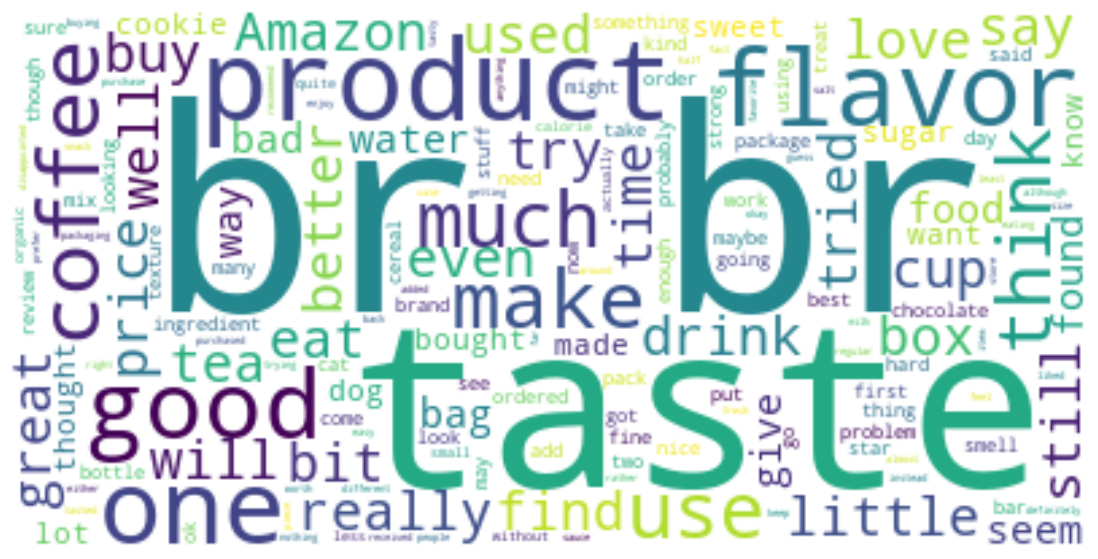

In [59]:
Neut = df2.loc[df2.Review =="Neutral"].Text
text= " ".join(review for review in Neut.astype(str))
generate_wcloud(text)

#Splitting the data into training and testing

In [50]:
x = df2.Text
y = df2.Review
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=1, stratify=y)

In [51]:
x_train.shape, x_test.shape

((314924,), (78732,))

#CountVectorizer

In [52]:
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(x_train)
bow_x_train=bow_vectorizer.transform(x_train)
bow_x_test=bow_vectorizer.transform(x_test)

In [53]:
bow_x_train

<314924x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 16454646 stored elements in Compressed Sparse Row format>

#TfidVectorizer

In [54]:
tfidf_vectorizer=TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(x_train)
tfidf_x_train=tfidf_vectorizer.transform(x_train)
tfidf_x_test=tfidf_vectorizer.transform(x_test)

#Label Encoder

In [55]:
labelEncoder = LabelEncoder()
y_train=labelEncoder.fit_transform(y_train)
y_test=labelEncoder.fit_transform(y_test)
labels=labelEncoder.classes_.tolist()
print(labels)

['Negative', 'Neutral', 'Positive']


#Model training and evaluation

In [56]:
def train_and_eval(model,trainx,trainy,testx,testy):
    #training
    model.fit(trainx,trainy)
    
    #predictions
    y_preds_train=model.predict(trainx)
    y_preds_test=model.predict(testx)
    
    #evaluation
    print()
    print(model)
    print(f"Train accuracy score: {accuracy_score(y_train,y_preds_train)}")
    print(f"Test accuracy score: {accuracy_score(y_test,y_preds_test)}")
    print('\n',40*'-')

### Logistic Regression with Hyperparameters & CountVectorizer

In [83]:
#Hyperparameters
C=[0.001,0.01,0.1,1,10]
for c in C:
    #Define model
    log_model=LogisticRegression(C=c, max_iter=500, random_state=1)
    
    #Train and evaluate model
    train_and_eval(model=log_model,trainx=bow_x_train,trainy=y_train,testx=bow_x_test,testy=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score: 0.8421508858830253
Test accuracy score: 0.8391820664253509

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score: 0.8653584809805043
Test accuracy score: 0.8581825109544675

 ----------------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score: 0.8777100400076205
Test accuracy score: 0.8613958214263034

 ----------------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score: 0.8817266780974153
Test accuracy score: 0.858195211786372

 ----------------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score: 0.881532990410872
Test accuracy score: 0.8580936051311361

 ----------------------------------------


### Naive-Bays Model with Hyperparameters & CountVectorizer

In [84]:
alphas=[0,0.2,0.6,0.8,1]
for a in alphas:
    #Define model
    nb_model=MultinomialNB(alpha=a)
    
    #Train and evaluate model
    train_and_eval(model=nb_model,trainx=bow_x_train,trainy=y_train,testx=bow_x_test,testy=y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(



MultinomialNB(alpha=0)
Train accuracy score: 0.8133263478757858
Test accuracy score: 0.8069727567155649

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score: 0.8130469295738871
Test accuracy score: 0.8070235600431829

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score: 0.8128913443830571
Test accuracy score: 0.80684574839652

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score: 0.8128151393916302
Test accuracy score: 0.8068584492284244

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score: 0.812786562519845
Test accuracy score: 0.806794945068902

 ----------------------------------------


### Logistic Regression with Hyperparameters & TfidfVectorizer

In [85]:
#Hyperparameters
C=[0.001,0.01,0.1,1,10]
for c in C:
    #Define model
    log_model=LogisticRegression(C=c, max_iter=500, random_state=1)
    
    #Train and evaluate model
    train_and_eval(model=log_model,trainx=tfidf_x_train,trainy=y_train,testx=tfidf_x_test,testy=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score: 0.7793706737791325
Test accuracy score: 0.7793738489871087

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score: 0.8145107004508796
Test accuracy score: 0.8132342668444783

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score: 0.8602336953070426
Test accuracy score: 0.8570267352511589

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score: 0.8769003619737092
Test accuracy score: 0.8658284117609704

 ----------------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score: 0.8832317266780975
Test accuracy score: 0.8626024004572299

 ----------------------------------------


### Naive-Bays Model with Hyperparameters & TfidfVectorizer

In [86]:
alphas=[0,0.2,0.6,0.8,1]
for a in alphas:
    #Define model
    nb_model=MultinomialNB(alpha=a)
    
    #Train and evaluate model
    train_and_eval(model=nb_model,trainx=tfidf_x_train,trainy=y_train,testx=tfidf_x_test,testy=y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(



MultinomialNB(alpha=0)
Train accuracy score: 0.8181590144154443
Test accuracy score: 0.8152791007811011

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score: 0.8177716390423573
Test accuracy score: 0.814859973328253

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score: 0.8168286022734489
Test accuracy score: 0.8140598209182701

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score: 0.8163332698291738
Test accuracy score: 0.8136660951292309

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score: 0.8157553819775195
Test accuracy score: 0.8131834635168603

 ----------------------------------------


### Best model: Logistic Regression (C=1) with Tfidf data

In [57]:
bmodel = LogisticRegression(C=1, max_iter=500, random_state=1)
bmodel.fit(tfidf_x_train, y_train)

LogisticRegression(C=1, max_iter=500, random_state=1)

In [58]:
#predictions
y_preds_train = bmodel.predict(tfidf_x_train)
y_preds_test = bmodel.predict(tfidf_x_test)

In [92]:
print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")

Train accuracy score : 0.8769003619737092
Test accuracy score : 0.8658284117609704


In [99]:
def plot_cm(y_true, y_pred):
    plt.figure(figsize=(6,6))
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',xticklabels=labels, yticklabels=labels)
    return plt.show()

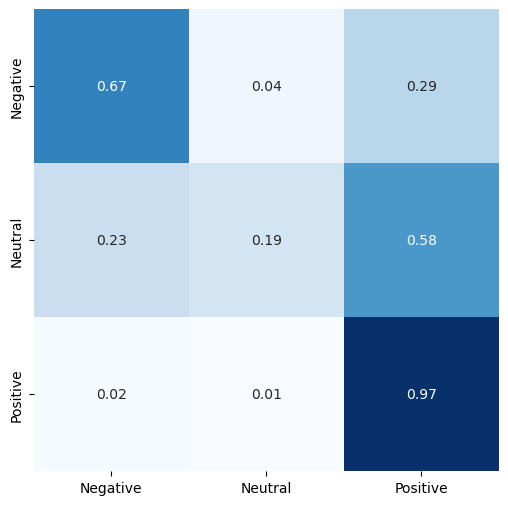

In [100]:
plot_cm(y_test,y_preds_test)

#Importing as 'pickle' file

In [68]:
import pickle

In [69]:
#pre-processing model
with open("transformer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)
#predicted model
with open("Sentiment-Prediction.pkl", "wb") as f:
    pickle.dump(bmodel, f)